In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [51]:
df = pd.read_csv("twitter.csv")
df.head()


,count,hate_speech,offensive_language,neither,class,Tweet
0,1,1,0,0,0,I hate you
1,2,0,1,0,1,You are so stupid
2,3,0,0,1,2,Have a nice day!
3,4,0,1,0,1,You're an idiot
4,5,1,0,0,0,I wish you didn't exist


In [52]:
df.isnull().sum()


count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
Tweet                 0
dtype: int64

In [53]:
df['class'].value_counts()


class
0    2
1    2
2    2
Name: count, dtype: int64

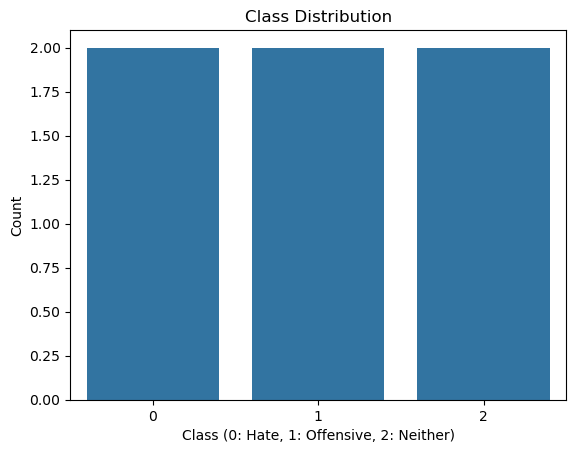

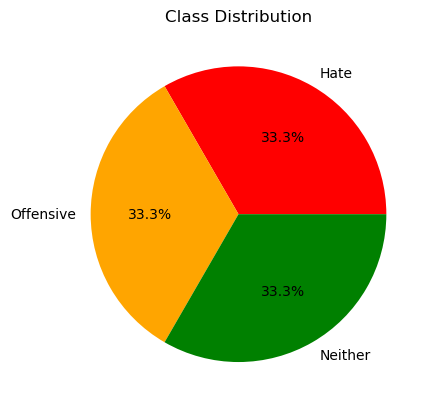

In [54]:
# Bar chart
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class (0: Hate, 1: Offensive, 2: Neither)')
plt.ylabel('Count')
plt.show()

# Pie chart
df['class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['red', 'orange', 'green'], labels=['Hate', 'Offensive', 'Neither'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


In [59]:
df['Tweet'] = df['Tweet'].str.lower().str.replace(r'[^\w\s]', '', regex=True)


In [63]:
X = df['Tweet']
y = df['class']


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [64]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [65]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)


MultinomialNB()

In [66]:
y_pred = model.predict(X_test_vec)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\cool\anaconda3_new\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cool\anaconda3_new\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\cool\anaconda3_new\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


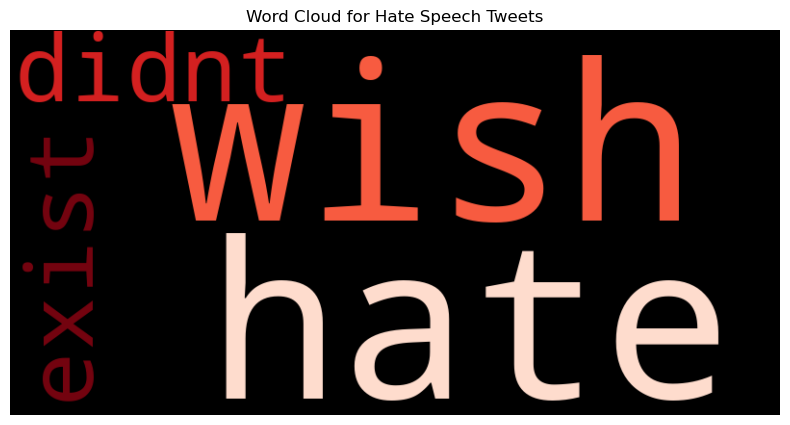

In [67]:
# Import here only
from wordcloud import WordCloud

hate_text = " ".join(df[df['class'] == 0]['Tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(hate_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Hate Speech Tweets")
plt.show()


In [69]:
from sklearn.utils import resample

# Separate classes
df_majority = df[df['class'] == 2]  # 'neither' or normal tweets
df_minority = df[df['class'] == 0]  # hate speech

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority
                                 random_state=42)

# Combine majority and upsampled minority
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Continue training with df_balanced instead of original df


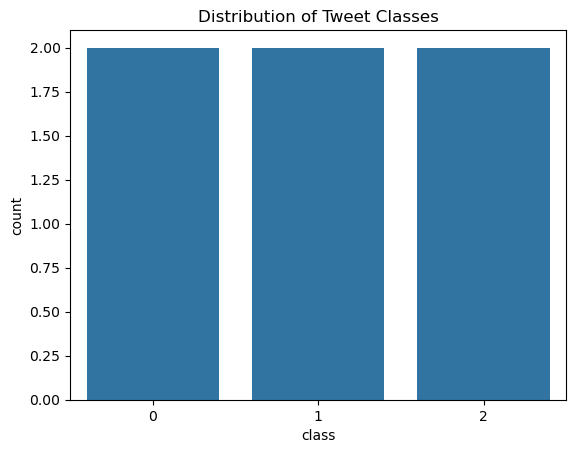

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='class', data=df)
plt.title("Distribution of Tweet Classes")
plt.show()
